# EXPLORATION

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


## Extrait et Shape du Dataset

In [8]:
## Paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
# folder_path_Y = 'C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON'
# folder_path_C = '../data/raw/Sales'
folder_path_L = 'C:/Users/User/Downloads/drive-download-20250508T155351Z-1-001'

## Load dataset
# input_file = os.path.join(folder_path_M, 'merged_sales_data.csv')
#input_file = os.path.join(folder_path_Y, 'merged_sales_data.csv')
# input_file = os.path.join(folder_path_C, 'merged_sales_data.csv')
input_file = os.path.join(folder_path_L, 'merged_sales_data.csv')

chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(input_file, sep=';', chunksize=chunksize, index_col=None, on_bad_lines='skip', low_memory=False)

# Process chunks
df_sales = pd.concat(chunk for chunk in chunks)


print("\n","extrait du Dataset" , df_sales.head(), "\n")
print("\n","Shape du Dataset",df_sales.shape, "\n")



 extrait du Dataset                   idannonce type_annonceur typedebien typedetransaction  \
0  entities-1037638-4560933             pr          m                 v   
1      immo-facile-57743459             pr          a                 v   
2  entities-1037666-4560741             pr          m                 v   
3      immo-facile-57762298             pr          m                 v   
4      immo-facile-57762759             pr          m                 v   

   etage  surface  surface_terrain  nb_pieces  prix_bien  prix_maison  ...  \
0      0       79            470.0          4     241000          NaN  ...   
1      0       65            650.0          2     136000          NaN  ...   
2      0      114            450.0          5     260900          NaN  ...   
3      0      148           1500.0          7     286000          NaN  ...   
4      0      213           2251.0          8     435000          NaN  ...   

   UU2010  REG  DEP  loyer_m2_median_n6  nb_log_n6 taux_ren

## Gestion des Doublons

In [9]:
print("Nombres de lignes en double", df_sales.duplicated().sum())

df_sales.drop_duplicates(inplace=True)

print("Nombres de lignes en double après suppression", df_sales.duplicated().sum())
print("Shape du Dataset après élimination des doublons : ",df_sales.shape)

Nombres de lignes en double 4658482
Nombres de lignes en double après suppression 0
Shape du Dataset après élimination des doublons :  (5190844, 59)


## Gestion des NANs

### Proportions des NANs

In [10]:
missing_data_percentage_sales = df_sales.isna().sum()*100/len(df_sales)

missing_value_percentage_sales = pd.DataFrame({'column_name': df_sales.columns,
                                         'percent_missing': missing_data_percentage_sales,
                                         'dtypes':df_sales.dtypes}
                                         ).sort_values(by='percent_missing', ascending=False)

# Resetting the index to start from 1 for better readability
# and to match the original DataFrame's index
missing_value_percentage_sales.index = range(1, len(missing_value_percentage_sales) + 1)

display(missing_value_percentage_sales)

,column_name,percent_missing,dtypes
1,parking,99.754356,object
2,videophone,99.025342,object
3,prix_terrain,98.686630,float64
4,prix_maison,98.677633,float64
5,surface_balcon,97.674290,float64
6,nb_terraces,80.529987,float64
7,charges_copro,73.171819,float64
8,nb_logements_copro,72.786275,float64
9,porte_digicode,72.740271,object
10,ascenseur,71.458745,object


### Visualisation des NANs

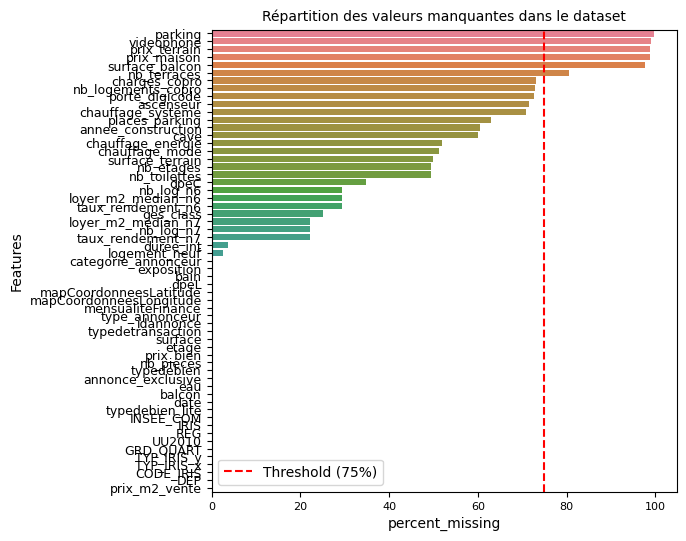

In [11]:
plt.figure(figsize=(6, 6))

sns.barplot(
    y=missing_value_percentage_sales.column_name,
    x=missing_value_percentage_sales.percent_missing,
    hue=missing_value_percentage_sales.column_name,
    order=missing_value_percentage_sales.column_name
)

# Add a vertical line at x=50 (adjust as needed)
plt.axvline(x=75, color='red', linestyle='--', label='Threshold (75%)')

plt.title('Répartition des valeurs manquantes dans le dataset', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.ylabel('Features')
plt.legend()

plt.show()



### Elimination de colonnes (valeurs manquantes supérieures à 75 %)

In [12]:
# Filtrer les colonnes avec un taux de valeurs manquantes inférieur ou égal à 75%
columns_to_keep = missing_data_percentage_sales[missing_data_percentage_sales <= 75].index

# Mettre à jour le DataFrame en gardant uniquement les colonnes sélectionnées
df_sales_short_1 = df_sales[columns_to_keep]

print("Colonnes conservées :", list(columns_to_keep))
print("\nShape du Dataset après élimination des colonnes :", df_sales_short_1.shape)

Colonnes conservées : ['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction', 'etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien', 'mensualiteFinance', 'balcon', 'eau', 'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude', 'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages', 'places_parking', 'cave', 'exposition', 'ges_class', 'annee_construction', 'nb_toilettes', 'porte_digicode', 'ascenseur', 'nb_logements_copro', 'charges_copro', 'chauffage_energie', 'chauffage_systeme', 'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'duree_int', 'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 'DEP', 'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6', 'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7', 'prix_m2_vente']

Shape du Dataset après élimination des colonnes : (5190844, 53)


## Conversion de la colonne 'date' 

In [13]:
df_sales_short_1.loc[:, 'date'] = pd.to_datetime(df_sales_short_1['date'], format='%Y-%m')

print(df_sales_short_1['date'].head())

0    2025-02-01 00:00:00
1    2025-02-01 00:00:00
2    2025-02-01 00:00:00
3    2025-02-01 00:00:00
4    2025-02-01 00:00:00
Name: date, dtype: object


# DATAVIZ

### Modalités des variables catégorielles ( moins de 10 modalités )

In [14]:
# Combine object and numerical columns
columns_to_check = df_sales_short_1.select_dtypes(include=['object', 'int64', 'float64']).columns

columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_sales_short_1[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) < 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)


Column: type_annonceur
Unique Values: ['pr' 'pa']
--------------------------------------------------
Column: typedebien
Unique Values: ['m' 'a' 'an' 'mn' 'Maison/Villa neuve' 'h' 'l']
--------------------------------------------------
Column: typedetransaction
Unique Values: ['v' 'vp' 'pi']
--------------------------------------------------
Column: annonce_exclusive
Unique Values: ['0' 'Oui' 'Non']
--------------------------------------------------
Column: cave
Unique Values: [False True]
--------------------------------------------------
Column: porte_digicode
Unique Values: [False True]
--------------------------------------------------
Column: ascenseur
Unique Values: [False True]
--------------------------------------------------
Column: chauffage_mode
Unique Values: ['Individuel' 'Collectif' 'Individuel, Central' 'Central'
 'Collectif, Central' 'Collectif, Individuel'
 'Collectif, Individuel, Central']
--------------------------------------------------
Column: categorie_annonceur


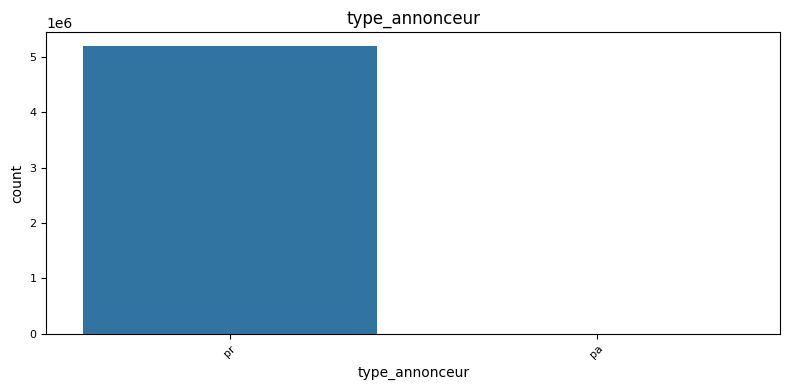

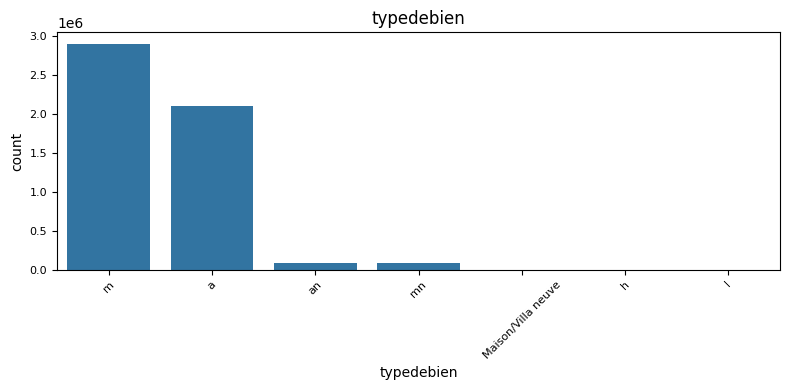

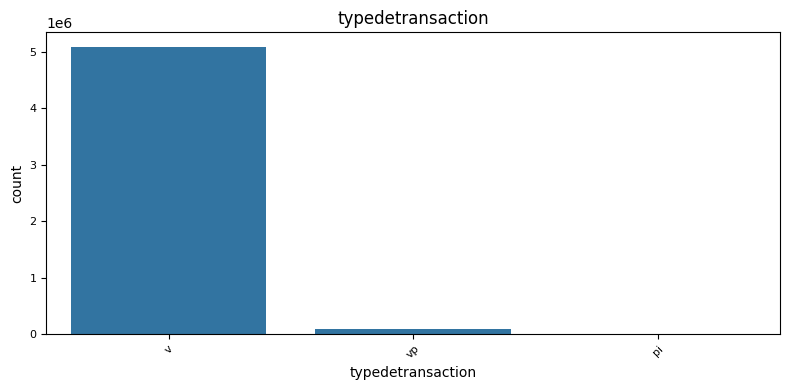

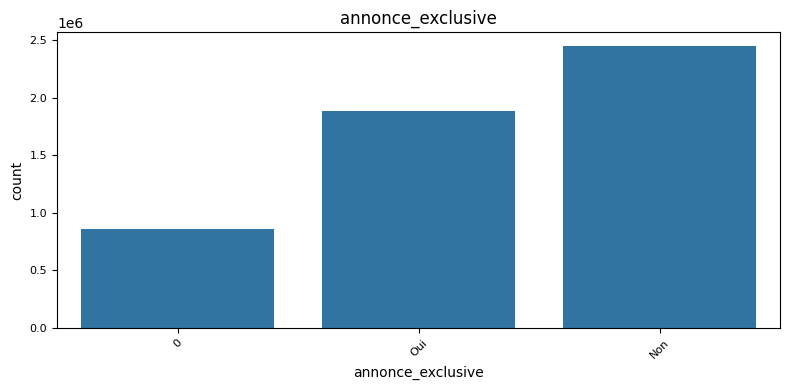

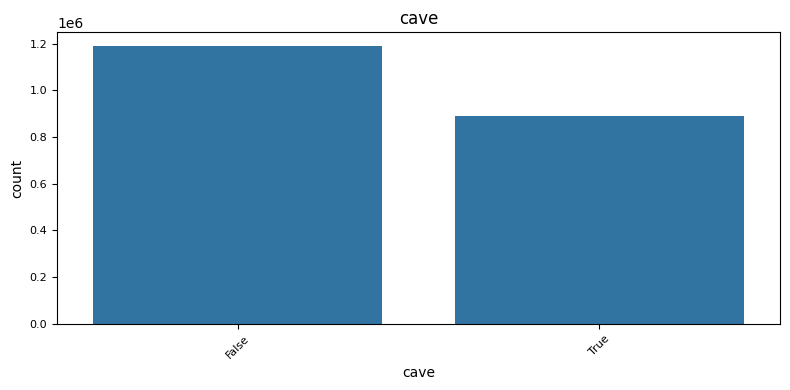

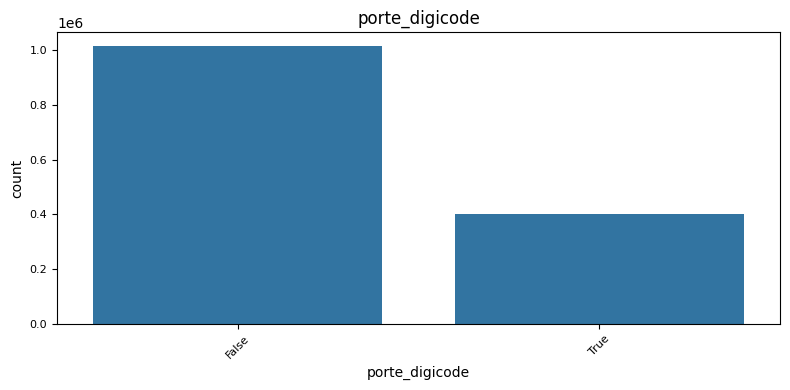

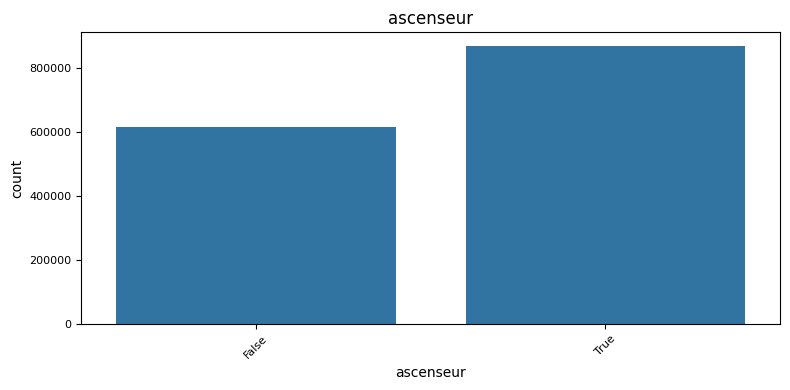

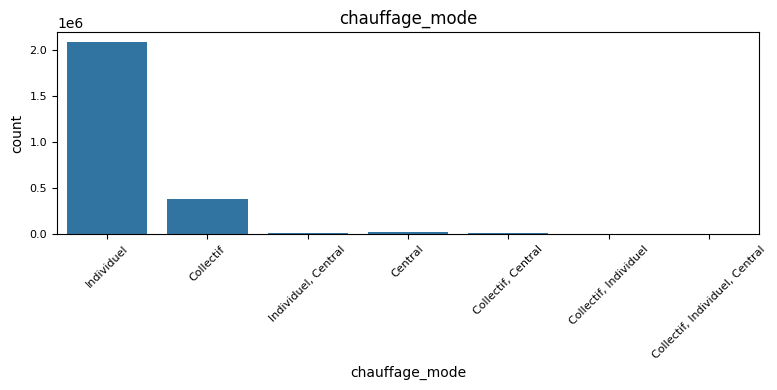

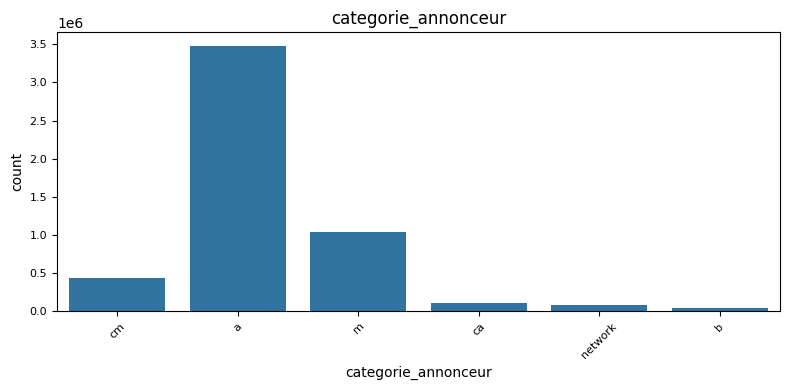

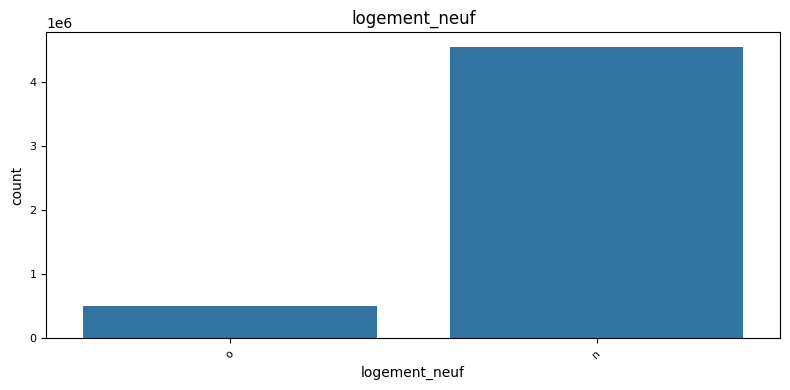

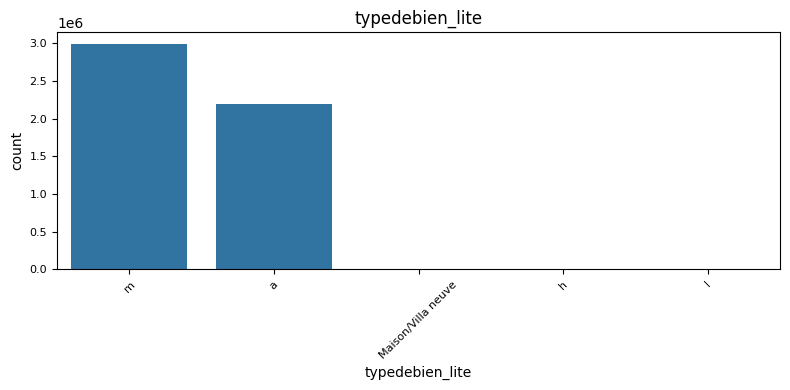

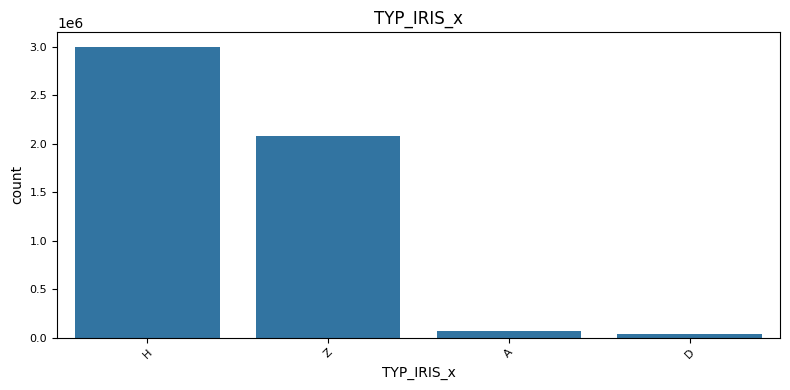

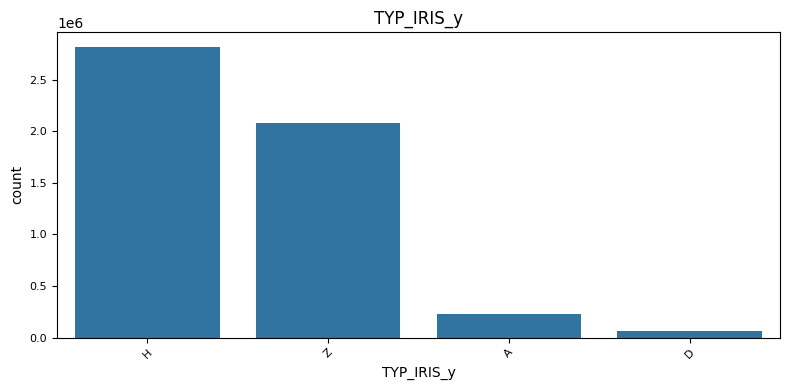

In [15]:
for var_to_viz in columns_checked:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_sales_short_1, x=var_to_viz)
    plt.title(f'{var_to_viz}')
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

### Modalités des autres variables ( plus de 10 modalités )

In [16]:
columns_investigated = columns_checked
df_sales_remaining = df_sales_short_1.drop(columns_investigated,axis=1)

columns_to_check = df_sales_remaining.select_dtypes(include=['object']).columns
columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_sales_remaining[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) > 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)

Column: idannonce
Unique Values: ['entities-1037638-4560933' 'immo-facile-57743459'
 'entities-1037666-4560741' ... 'orpi-1-129011E1Q7IG'
 'orpi-1-129011E1W58D' 'orpi-1-129011E1L4UB']
--------------------------------------------------
Column: dpeL
Unique Values: ['0' 'D' 'G' 'A' 'C' 'E' 'NS' 'F' 'VI' 'B' 'Blank' 'B kWh/m².year' '856'
 'D kWh/m².year' 'A kWh/m².year' 'E kWh/m².year' 'C kWh/m².year'
 'Classe indeterminee' "'" '0 kWh/m².year' 'F kWh/m².year'
 'D - 231 kWh/m².year' 'D-218 kWh/m².year' '26']
--------------------------------------------------
Column: exposition
Unique Values: ['0' 'Sud-Ouest' 'Sud' 'Sud-Est' 'Sud/Est' 'Est' 'SO' 'Ouest' 'E, S'
 'Est-Ouest' 'Nord-Ouest' 'Nord-Sud' 'sud-ouest' 'sud-est'
 'Traversant-Est-Ouest' 'traversant' 'Nord' 'traversant nord-sud'
 'nord-est / sud-ouest' 'Sud-Est-Ouest' 'Nord-Est' 'OUEST' 'NE'
 'Sud/Ouest' 'NS' 'Nord Sud Est' 'SUD' 'SUD OUEST' 'Nord/Ouest'
 'Nord Sud Est Ouest' 'SUD EST' 'Nord-ouest' 'nord-ouest / sud-est'
 'EST SUD OUEST'

# VARIABLES EXPICATIVES À ÉLIMINER

> La colonne 'idannonce' est un identifiant unique pour chaque annonce, elle n'est pas utile pour l'analyse

> La colonne 'annonce_exclusive' est une variable qui n'est pas utile pour l'analyse

> La colonne 'typedebien' et 'typedebien_lite' contiennent les mêmes informations; nous gardons la plus riche des deux : 'typedebien

> La colonne 'type_annonceur' offre une distribution de valeurs trop déséquilibrée

> Les colonnes 'REG', 'DEP', 'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010' sont des colonnes contenant de l'information redondante, de plus nous créerons une nouvelle colonne pour le code postal, générée à partir des coordonnées géographiques

> nous gardons la colonne 'INSEE_COM' pour l'utiliser lors de la gestion des outliers après le split

In [17]:
df_sales_short_2 = df_sales_short_1.drop(columns=['idannonce', 'annonce_exclusive', 'typedebien_lite', 
                                                  'type_annonceur', 'categorie_annonceur',
                                                  'REG', 'DEP', 'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y',
                                                  'nb_logements_copro',
                                                  'GRD_QUART', 'UU2010'], axis=1)

df_sales_short_2.shape

(5190844, 39)

### Visualisation nettoyage

In [18]:
missing_data_percentage_sales = df_sales_short_2.isna().sum()*100/len(df_sales_short_2)

missing_value_percentage_sales = pd.DataFrame({'column_name': df_sales_short_2.columns,
                                         'percent_missing': missing_data_percentage_sales,
                                         'dtypes':df_sales_short_2.dtypes}
                                         ).sort_values(by='percent_missing', ascending=False)

# Resetting the index to start from 1 for better readability
# and to match the original DataFrame's index
missing_value_percentage_sales.index = range(1, len(missing_value_percentage_sales) + 1)

display(missing_value_percentage_sales)

,column_name,percent_missing,dtypes
1,charges_copro,73.171819,float64
2,porte_digicode,72.740271,object
3,ascenseur,71.458745,object
4,chauffage_systeme,70.861155,object
5,places_parking,62.885323,float64
6,annee_construction,60.448050,float64
7,cave,59.933202,object
8,chauffage_energie,51.808473,object
9,chauffage_mode,51.345658,object
10,surface_terrain,49.904621,float64


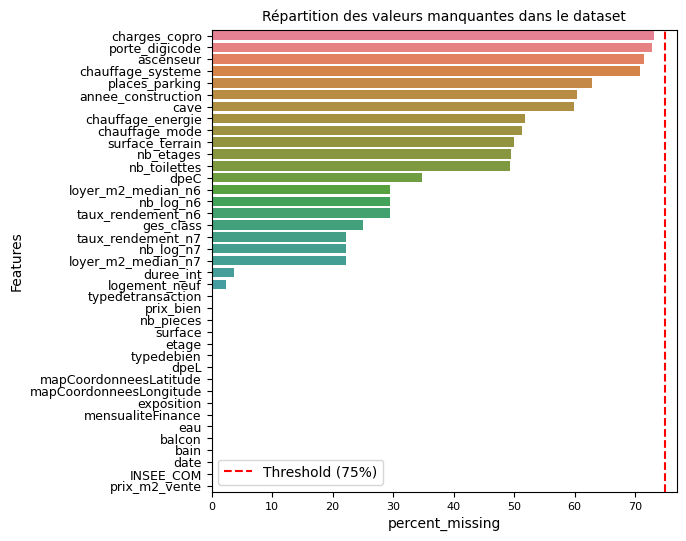

In [19]:
plt.figure(figsize=(6, 6))

sns.barplot(
    y=missing_value_percentage_sales.column_name,
    x=missing_value_percentage_sales.percent_missing,
    hue=missing_value_percentage_sales.column_name,
    order=missing_value_percentage_sales.column_name
)

# Add a vertical line at x=50 (adjust as needed)
plt.axvline(x=75, color='red', linestyle='--', label='Threshold (75%)')

plt.title('Répartition des valeurs manquantes dans le dataset', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.ylabel('Features')
plt.legend()

plt.show()


# VARIABLES EXPLICATIVES À TRAITER

In [20]:
# les variables porte_digicode, ascenseur et cave sont des variables binaires typées en 'object'
# nous les transofrmins en type boleeen
bool_columns = ['porte_digicode', 'cave', 'ascenseur']
for col in bool_columns:
    df_sales_short_2[col] = df_sales_short_2[col].astype(bool)

# vérification des types des colonnes converties
df_sales_short_2[bool_columns].dtypes

porte_digicode    bool
cave              bool
ascenseur         bool
dtype: object

### La variable "annee_construction" est transformée en variable catégorielle nominale

In [21]:
# La variable "annee_construction" est transformée en variable catégorielle non ordinale :

# Définir les plages et les catégories (plages trouvées du le net comme étant celles correspondant à des ensembles cohérents)
bins = [float('-inf'), 1948, 1974, 1977, 1982, 1988, 2000, 2005, 2012, 2021, float('inf')]
labels = [
    "avant 1948", "1948-1974", "1975-1977", "1978-1982", "1983-1988",
    "1989-2000", "2001-2005", "2006-2012", "2013-2021", "après 2021"
]
df_sales_short_2['annee_construction'] = pd.cut(df_sales_short_2['annee_construction'], bins=bins, labels=labels, right=False)
# Vérification de la transformation
print(df_sales_short_2['annee_construction'].head())


0           NaN
1    avant 1948
2           NaN
3     1948-1974
4           NaN
Name: annee_construction, dtype: category
Categories (10, object): ['avant 1948' < '1948-1974' < '1975-1977' < '1978-1982' ... '2001-2005' < '2006-2012' < '2013-2021' < 'après 2021']


## DPeL et ges_class

In [22]:
# Cellule : Nettoyage DPE/GES, chauffage principal et exposition

import re               # Pour les expressions régulières
import numpy as np      # Pour les opérations numériques et NaN
import pandas as pd     # Pour la manipulation des DataFrame

# 1. Fonctions utilitaires

def clean_classe(val):
    """
    Nettoie et standardise les classes DPE/GES :
    - Vide, "Blank" ou "0" → np.nan
    - Conserve A→G, NS, VI
    - Sinon, extrait un code valide en début de chaîne via regex
    """
    # Cas manquant
    if pd.isna(val) or str(val).strip() in ["", "Blank", "0"]:
        return np.nan
    # Mise en majuscule et suppression des espaces
    s = str(val).strip().upper()
    # Acceptation stricte des codes connus
    if s in ["A","B","C","D","E","F","G","NS","VI"]:
        return s
    # Tentative de capture d'un code valide en début de chaîne
    m = re.match(r"^(NS|VI|[A-G])", s, re.IGNORECASE)
    return m.group(1).upper() if m else np.nan


def extract_principal(val):
    """
    Extrait la première source énergétique listée.
    Séparateurs gérés : ',', ';', '/', 'et'
    """
    # Cas manquant ou chaîne vide
    if pd.isna(val) or not str(val).strip():
        return np.nan
    # Split sur les séparateurs, on ne garde que la première partie
    parts = re.split(r"\s*(?:,|;|/|et)\s*", str(val).strip(), maxsplit=1)
    return parts[0] if parts else np.nan


# Configuration pour la normalisation de l'exposition
PATTERN_EXPO = r"(?i)\b(?:Nord(?:-Est|-Ouest)?|Sud(?:-Est|-Ouest)?|Est|Ouest|N|S|E|O)\b"
ORDRE_EXPO  = ["Nord","Est","Sud","Ouest"]
NORM_DIR    = {
    "N":"Nord","S":"Sud","E":"Est","O":"Ouest",
    "NORD":"Nord","SUD":"Sud","EST":"Est","OUEST":"Ouest",
    "NORD-EST":"Nord-Est","NORD-OUEST":"Nord-Ouest",
    "SUD-EST":"Sud-Est","SUD-OUEST":"Sud-Ouest"
}

def clean_exposition(val):
    """
    Nettoie et standardise la colonne exposition :
    - Détecte les mots-clés de multi-exposition → "Multi-exposition"
    - Extrait les points cardinaux via regex
    - Traduit et normalise selon NORM_DIR
    - Trie et déduplique selon ORDRE_EXPO
    """
    # Cas manquant ou valeur vide
    if pd.isna(val) or str(val).strip() in ["","0"]:
        return np.nan
    s   = str(val).strip()
    low = s.lower()
    # 1) Multi-exposition via mots-clés
    if any(kw in low for kw in ["traversant","multi","toutes","double expo","triple","360"]):
        return "Multi-exposition"
    # 2) Extraction des directions
    matches = re.findall(PATTERN_EXPO, s, flags=re.IGNORECASE)
    dirs = [
        NORM_DIR[m.upper().replace(" ","-")]
        for m in matches
        if m.upper().replace(" ","-") in NORM_DIR
    ]
    # 3) Tri et déduplication
    uniq = sorted(set(dirs), key=lambda d: ORDRE_EXPO.index(d.split("-")[0]))
    return "-".join(uniq) if uniq else np.nan


# 2. Application des fonctions sur df_sales_short_2

# 2.1 : Nettoyage des colonnes DPE et GES
for col in ("dpeL","ges_class"):
    if col in df_sales_short_2.columns:
        df_sales_short_2[col] = (
            df_sales_short_2[col]
            .apply(clean_classe)    # Applique clean_classe à chaque valeur
            .astype("object")       # Force le type chaîne pour les résultats
        )

# 2.2 : Extraction de l'énergie de chauffage principale
if "chauffage_energie" in df_sales_short_2.columns:
    df_sales_short_2["chauffage_energie_principal"] = (
        df_sales_short_2["chauffage_energie"]
            .apply(extract_principal)  # Garde la première source énergétique
            .astype("object")
    )

# 2.3 : Nettoyage de la colonne exposition
if "exposition" in df_sales_short_2.columns:
    df_sales_short_2["exposition"] = (
        df_sales_short_2["exposition"]
            .apply(clean_exposition)   # Standardise les orientations
            .astype("object")
    )

# 3. Contrôles rapides pour valider le nettoyage

# Affiche un aperçu des premières lignes
display(df_sales_short_2[[
    "dpeL",
    "ges_class",
    "chauffage_energie_principal",
    "exposition"
]].head(10))

# Liste des valeurs uniques par colonne
print("Classes DPE :", df_sales_short_2["dpeL"].unique())
print("Classes GES :", df_sales_short_2["ges_class"].unique())
print("Énergies principales :", df_sales_short_2["chauffage_energie_principal"].unique())
print("Expositions :", df_sales_short_2["exposition"].unique())

,dpeL,ges_class,chauffage_energie_principal,exposition
0,NaN,NaN,NaN,NaN
1,D,D,Fioul,NaN
2,NaN,NaN,NaN,NaN
3,D,D,NaN,NaN
4,D,D,NaN,NaN
5,G,G,Fioul,Sud-Ouest
6,A,A,NaN,NaN
7,G,G,Fioul,Sud
8,C,D,Gaz,Sud-Est
9,E,B,Électrique,Sud


Classes DPE : [nan 'D' 'G' 'A' 'C' 'E' 'NS' 'F' 'VI' 'B']
Classes GES : [nan 'D' 'G' 'A' 'B' 'C' 'E' 'NS' 'F' 'VI']
Énergies principales : [nan 'Fioul' 'Gaz' 'Électrique' 'Bois']
Expositions : [nan 'Sud-Ouest' 'Sud' 'Sud-Est' 'Est-Sud' 'Est' 'Ouest' 'Est-Ouest'
 'Nord-Ouest' 'Nord-Sud' 'Multi-exposition' 'Nord' 'Nord-Est-Sud-Ouest'
 'Sud-Est-Ouest' 'Nord-Est' 'Nord-Est-Sud' 'Nord-Ouest-Sud-Est'
 'Est-Sud-Ouest' 'Nord-Sud-Ouest' 'Nord-Est-Ouest' 'Sud-Sud-Est'
 'Est-Sud-Est' 'Nord-Ouest-Nord-Est' 'Sud-Ouest-Sud' 'Nord-Sud-Est'
 'Nord-Nord-Est' 'Nord-Sud-Est-Ouest' 'Nord-Ouest-Est' 'Nord-Est-Sud-Est'
 'Sud-Ouest-Sud-Est' 'Sud-Ouest-Sud-Ouest' 'Nord-Ouest-Sud-Ouest'
 'Nord-Est-Sud-Ouest-Sud-Est' 'Nord-Nord-Ouest']


## Création de la colonne CodePostal

In [23]:
#!pip install geopandas

In [25]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

## Paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
# folder_path_Y = "C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON/"
#folder_path_C = '../data/geo/json'
folder_path_L = 'C:/Users/User/Downloads/drive-download-20250508T155351Z-1-001'
#folder_path_L = '/Users/loick.d/Documents/Datascientest/Github immo/MAR25_BDS_Compagnon_Immo/'

geo_file_name = 'contours-codes-postaux.geojson'

input_file = os.path.join(folder_path_L, geo_file_name)
pcodes = gpd.read_file(input_file)

# Vérifier
# print(pcodes.columns)   

df = df_sales_short_2.copy()
df['lat'] = df['mapCoordonneesLatitude']
df['lon'] = df['mapCoordonneesLongitude']

# Convertir en GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lon, df.lat),
    crs="EPSG:4326"
)


# Faire la jointure spatiale (point-in-polygon)
result = gpd.sjoin(gdf, pcodes[['codePostal','geometry']], how='left', predicate='within')


# Gardez la première occurrence de chaque index (dans le cas où un point appartiendrait à plusieurs polygones, on ne conserve que le premier)
postal = result['codePostal']
postal = postal[~postal.index.duplicated(keep='first')]

# 3. Ré-indexez sur l’index original de df_sales_short_2 :
df_sales_short_2 = df_sales_short_2.copy()
df_sales_short_2['codePostal'] = postal.reindex(df.index)

# 4. Vérifiez
display(df_sales_short_2[['mapCoordonneesLatitude', 'mapCoordonneesLongitude', 'codePostal']].head())



,mapCoordonneesLatitude,mapCoordonneesLongitude,codePostal
0,46.24725,5.23465,01440
1,46.25701,5.22967,01440
2,46.28638,5.67499,01100
3,46.25997,5.23201,01440
4,46.25997,5.23201,01440


In [26]:
df_sales_short_2.isna().sum()
#df_sales_short_2.info()


typedebien                           0
typedetransaction                    0
etage                                0
surface                              0
surface_terrain                2590471
nb_pieces                            0
prix_bien                            0
mensualiteFinance                    0
balcon                               0
eau                                  0
bain                                 0
dpeL                            766301
dpeC                           1809046
mapCoordonneesLatitude               0
mapCoordonneesLongitude              0
nb_etages                      2568936
places_parking                 3264279
cave                                 0
exposition                     3867104
ges_class                      1298587
annee_construction             3137764
nb_toilettes                   2560813
porte_digicode                       0
ascenseur                            0
charges_copro                  3798235
chauffage_energie        

# VARIABLE CIBLE ET VARIABLES CORRÉLÉES À LA CIBLE

La variable cible est "prix_m2_vente"

## Visualisation de la distribution de la variable cible

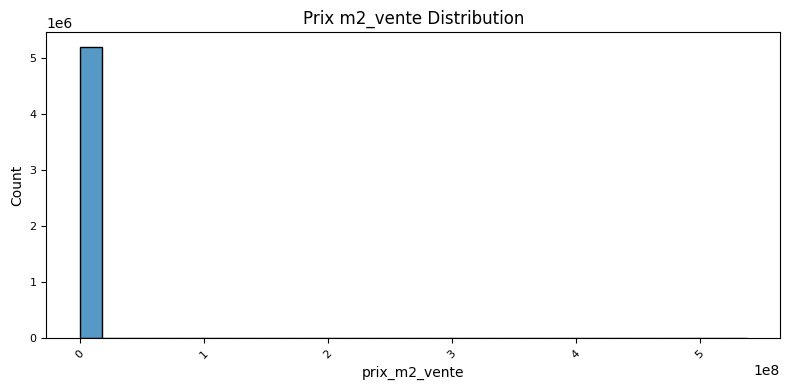

In [27]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales_short_2, x='prix_m2_vente', bins=30)
plt.title('Prix m2_vente Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliners, nous traiterons cette problématique lors du préprocessing (partie suivante)

## Suppression des variables fortement corrélées au target (prix_m2_vente)

> Certaines variables du csv de part leur nature pourraient être trop corrélées avec la variable cible  :
> prix, mensualité, etc.

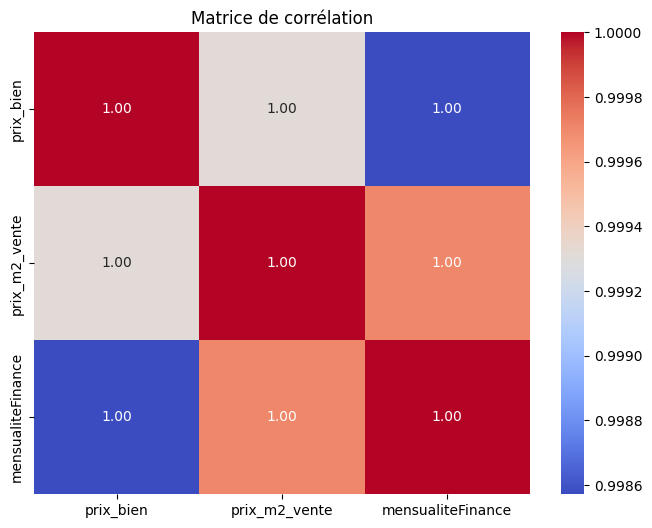

In [28]:
# Calculer la matrice de corrélation
correlation_matrix = df_sales_short_2[['prix_bien', 'prix_m2_vente','mensualiteFinance']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

> On va donc supprimer ces variables de la base de données :

In [29]:
# On va donc supprimer ces variables de la base de données et renommer le DataFrame:
df_sales_short_3 = df_sales_short_2.drop(columns=['prix_bien'])


# SÉPARATION DES DONNÉES TRAIN/TEST

## Sauvegarde du dataset avant split et Synthèse des colonnes restantes

In [30]:
## paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
# folder_path_Y = 'C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON'
# folder_path_C = '../data/processed/Sales'
folder_path_L = 'C:/Users/User/Downloads/drive-download-20250508T155351Z-1-001'

## stocker le dataset nettoyé dans le repertoire de travail et le nommer df_sales_clean.csv
# df_sales_short_3.to_csv(os.path.join(folder_path_M, 'df_sales_clean.csv'), sep=';', index=False)
#df_sales_short_3.to_csv(os.path.join(folder_path_Y, 'df_sales_clean.csv'), sep=';', index=False)
# df_sales_short_3.to_csv(os.path.join(folder_path_C, 'df_sales_clean.csv'), sep=';', index=False)
df_sales_short_3.to_csv(os.path.join(folder_path_L, 'df_sales_clean.csv'), sep=';', index=False)


# Reload dataset
# output_file = os.path.join(folder_path_M, 'df_sales_clean.csv')
#output_file = os.path.join(folder_path_Y, 'df_sales_clean.csv')
# output_file = os.path.join(folder_path_C, 'df_sales_clean.csv')
output_file = os.path.join(folder_path_L, 'df_sales_clean.csv')

chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(output_file, sep=';', chunksize=chunksize, index_col=None, on_bad_lines='skip', low_memory=False)
# Process chunks
df_sales_clean = pd.concat(chunk for chunk in chunks)

## Rappel des colonnes restantes
# print("Colonnes restantes dans le DataFrame :")
# print(df_sales_clean.columns)
# print(df_sales_clean.dtypes)
# print("\nShape du Dataset après élimination des colonnes :", df_sales_clean.shape)
print(df_sales_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190844 entries, 0 to 5190843
Data columns (total 40 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   typedebien                   object 
 1   typedetransaction            object 
 2   etage                        int64  
 3   surface                      int64  
 4   surface_terrain              float64
 5   nb_pieces                    int64  
 6   mensualiteFinance            int64  
 7   balcon                       int64  
 8   eau                          int64  
 9   bain                         int64  
 10  dpeL                         object 
 11  dpeC                         float64
 12  mapCoordonneesLatitude       float64
 13  mapCoordonneesLongitude      float64
 14  nb_etages                    float64
 15  places_parking               float64
 16  cave                         bool   
 17  exposition                   object 
 18  ges_class                    object 
 19  